In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv("ps.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [8]:
df.info

<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [9]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


NULL Check

<AxesSubplot:>

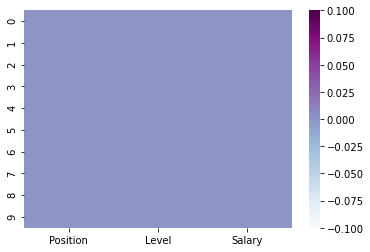

In [13]:
sns.heatmap(df.isnull(), yticklabels = True, cmap = "BuPu")

In [18]:
X = df.iloc[:, 1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [19]:
Y = df.iloc[:, 2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


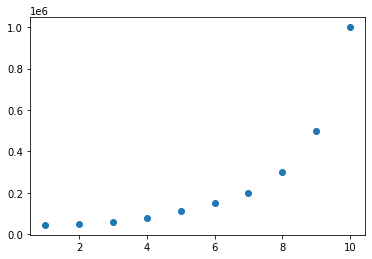

In [20]:
plt.scatter(X, Y)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

**Linear Regression**

In [23]:
LR = LinearRegression()

In [24]:
model = LR.fit(X_train , Y_train)

In [25]:
y_pred = LR.predict(X_test)

In [26]:
score= r2_score(Y_test, y_pred)
score

0.8451346684575975

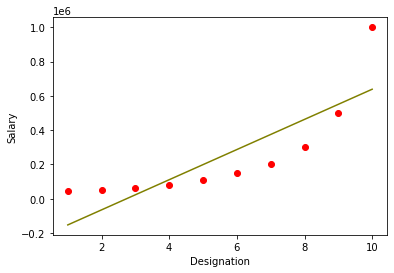

In [27]:
plt.scatter(X, Y, c = "red")
plt.plot(X, LR.predict(X), c = "olive")
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.show()

In [28]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [33]:
level = float(input())
LR.predict([[level]])

10


array([[638620.68965517]])

Polynomial Regession
Degree = 2

In [45]:
df = pd.read_csv("ps.csv")
X = df.iloc[:, 1:2]
Y = df.iloc[:, 2:]

In [46]:
PF = PolynomialFeatures(degree=2)
X = PF.fit_transform(X)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [48]:
PR2 = LinearRegression()
PR2.fit(X_train, Y_train)
y_pred = PR2.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.7896604512664295

Degree = 5

In [65]:
df = pd.read_csv("ps.csv")
X = df.iloc[:, 1:2]
Y = df.iloc[:, 2:]

In [66]:
PF = PolynomialFeatures(degree=5)
X = PF.fit_transform(X)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [68]:
PR5 = LinearRegression()
PR5.fit(X_train, Y_train)
y_pred = PR5.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.9949078503291525

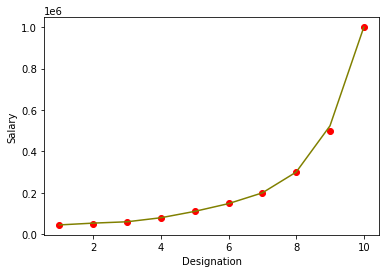

In [72]:
X = df.iloc[:, 1:2]
plt.scatter(X, Y, c = "red")
plt.plot(X, PR5.predict(PF.fit_transform(X)), c = "olive")
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.show()

In [73]:
level = float(input())
PR5.predict(PF.fit_transform([[level]]))

5


array([[110329.55043589]])